In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(576, 767, 3)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

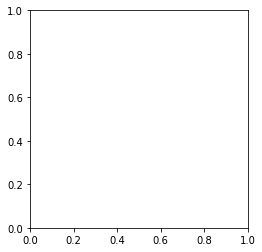

In [5]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
src = cv2.imread("/content/drive/MyDrive/Eslami/melanoma-test/MEL001.jpg")

print( src.shape )
#cv2.imshow("original Image" , src )


# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
#cv2.imshow("GrayScale",grayScale)
cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
#cv2.imshow("BlackHat",blackhat)
cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print( thresh2.shape )
#cv2.imshow("Thresholded Mask",thresh2)
cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
#cv2.imshow("InPaint",dst)
cv2.imwrite('C:\\SkinHairRemovalPython\\InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])